# Exp2：基于回归分析的大学综合得分预测
---

## 一、案例简介
大学排名是一个非常重要同时也极富挑战性与争议性的问题，一所大学的综合实力涉及科研、师资、学生等方方面面。目前全球有上百家评估机构会评估大学的综合得分进行排序，而这些机构的打分也往往并不一致。在这些评分机构中，世界大学排名中心（Center for World University Rankings，缩写CWUR）以评估教育质量、校友就业、研究成果和引用，而非依赖于调查和大学所提交的数据著称，是非常有影响力的一个。

本任务中我们将根据 CWUR 所提供的世界各地知名大学各方面的排名（师资、科研等），一方面通过数据可视化的方式观察不同大学的特点，另一方面希望构建机器学习模型（线性回归）预测一所大学的综合得分。

## 二、作业说明
使用来自 Kaggle 的[数据](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)，构建「线性回归」模型，根据大学各项指标的排名预测综合得分。

**基本要求：**
* 按照 8:2 随机划分训练集测试集，用 RMSE 作为评价指标，得到测试集上线性回归模型的 RMSE 值；
* 对线性回归模型的系数进行分析。

**扩展要求：**
* 对数据进行观察与可视化，展示数据特点；
* 尝试其他的回归模型，对比效果；
* 尝试将离散的地区特征融入线性回归模型，并对结果进行对比。

**注意事项：**
* 基本输入特征有 8 个：`quality_of_education`, `alumni_employment`, `quality_of_faculty`, `publications`, `influence`, `citations`, `broad_impact`, `patents`；
* 预测目标为`score`；
* 可以使用 sklearn 等第三方库，不要求自己实现线性回归；
* 需要保留所有数据集生成、模型训练测试的代码；

## 三、数据概览

假设数据文件位于当前文件夹，我们用 pandas 读入标准 csv 格式文件的函数`read_csv()`将数据转换为`DataFrame`的形式。观察前几条数据记录：

In [1]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(3).T  # 观察前几列并转置方便观察

,0,1,2
world_rank,1,2,3
institution,Harvard University,Massachusetts Institute of Technology,Stanford University
region,USA,USA,USA
national_rank,1,2,3
quality_of_education,7,9,17
alumni_employment,9,17,11
quality_of_faculty,1,3,5
publications,1,12,4
influence,1,4,2
citations,1,4,2


去除其中包含 NaN 的数据，保留 2000 条有效记录。

In [2]:
data_df = data_df.dropna()  # 舍去包含 NaN 的 row
len(data_df)

2000

In [5]:
feature_cols = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[feature_cols]
Y = data_df['score']
X

,quality_of_faculty,publications,citations,alumni_employment,influence,quality_of_education,broad_impact,patents
200,1,1,1,1,1,1,1.0,2
201,4,5,3,2,3,11,4.0,6
202,2,15,2,11,2,3,2.0,1
203,5,10,12,10,9,2,13.0,48
204,10,11,11,12,12,7,12.0,16
...,...,...,...,...,...,...,...,...
2195,218,926,812,567,845,367,969.0,816
2196,218,997,645,566,908,236,981.0,871
2197,218,830,812,549,823,367,975.0,824
2198,218,886,812,567,974,367,975.0,651


## 四、数据可视化

### Top 学校
我们首先观察世界排名前十学校的平均得分情况，为此需要将同一学校不同年份的得分做一个平均。这里我们可以利用`groupby()`函数，将同一学校的记录整合起来并通过`mean()`函数取平均。之后我们按平均得分降序排序，取前十个学校作为要观察的数据。

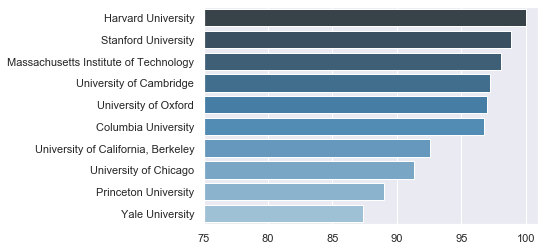

In [6]:
import matplotlib.pyplot as plt  # 作图
import seaborn as sns  # 作图

mean_df = data_df.groupby('institution').mean()  # 按学校聚合并对聚合的列取平均
top_df = mean_df.sort_values(by='score', ascending=False).head(10)  # 取前十学校
sns.set()
x = top_df['score'].values  # 综合得分列表
y = top_df.index.values  # 学校名称列表
sns.barplot(x, y, orient='h', palette="Blues_d")  # 画条形图
plt.xlim(75, 101)  # 限制 x 轴范围
plt.show()

用`pairplot`的方法观察变量之间的关联关系，可以从图中看到，少部分变量之间有线性关系；各个变量和结果之间，近似对数关系。

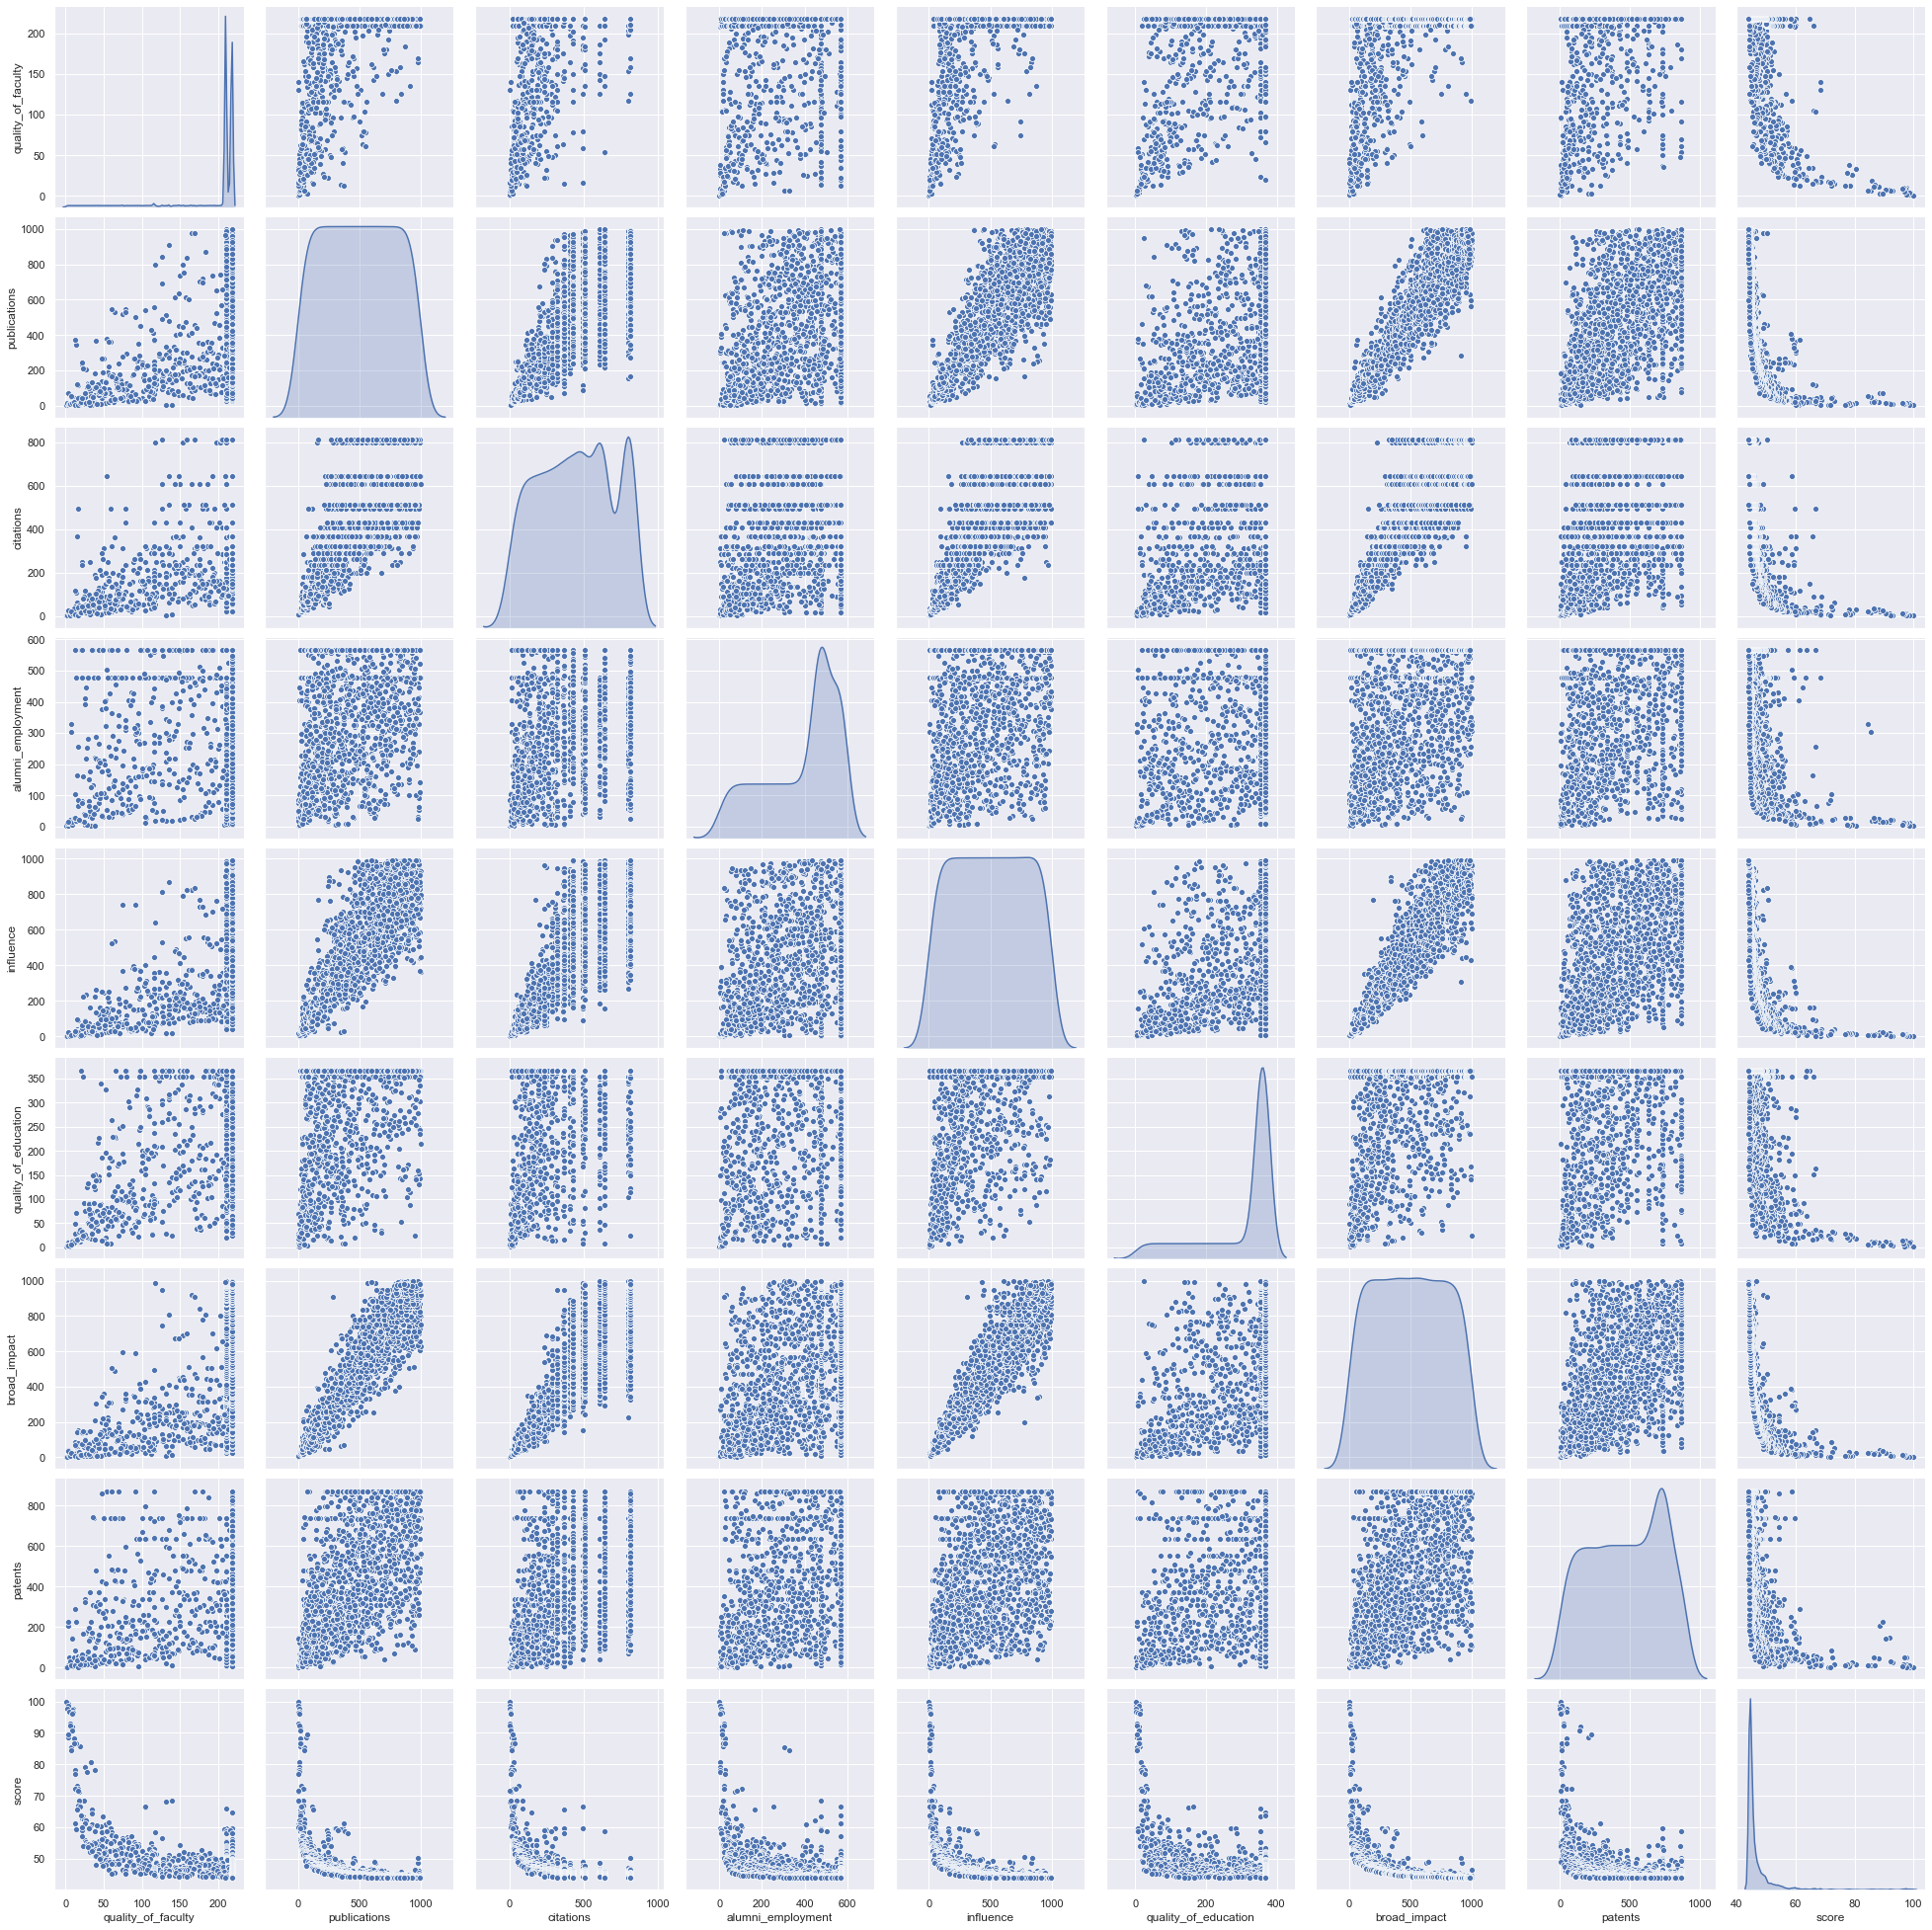

In [7]:
sns.pairplot(data_df[feature_cols + ['score']], height=3, diag_kind="kde")
plt.show()

还可以用热力图的形式呈现相关度矩阵：

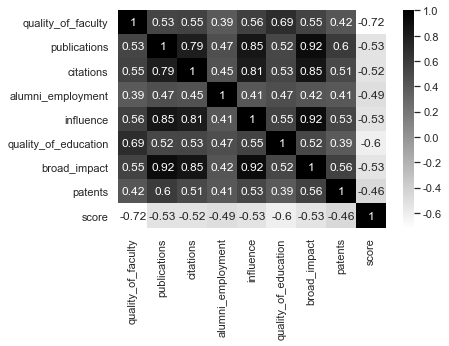

In [15]:
f = data_df[feature_cols + ['score']].corr()
sns.heatmap(f, annot=True, cmap=plt.get_cmap('binary'))
plt.show()

## 五、模型构建

取出对应自变量以及因变量的列，之后就可以基于此切分训练集和测试集，并进行模型构建与分析。

In [7]:
all_y = data_df['score'].values  
all_x = data_df[feature_cols].values
# 取 values 是为了从 pandas 的 Series 转成 numpy 的 array

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_x, all_y, test_size=0.2, random_state=2020)
all_y.shape, all_x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape # 输出数据行列信息

((2000,), (2000, 8), (1600, 8), (400, 8), (1600,), (400,))

In [8]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()  # 线性回归模型
LR.fit(x_train, y_train)  # 在训练集上训练
p_test = LR.predict(x_test)  # 在测试集上预测，获得预测值
test_error = p_test - y_test  # 预测误差
test_rmse = (test_error**2).mean()**0.5  # 计算 RMSE
'rmse: {:.4}'.format(test_rmse) 

'rmse: 3.999'

得到测试集的 RMSE 为 3.999，在百分制的预测目标下算一个尚可的结果。从评价指标上看貌似我们能根据各方面排名较好的预估综合得分，接下来我们观察一下学习到的参数，即各指标排名对综合得分的影响权重。

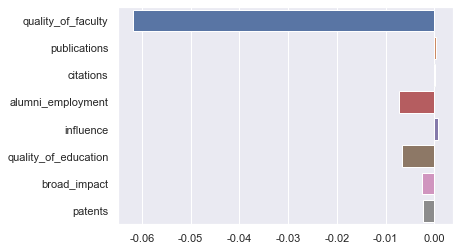

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.barplot(x=LR.coef_, y=feature_cols)
plt.show()

这里会发现综合得分的预测基本被「师资质量」这一自变量主导了，「就业」和「教育质量」这两个因素也有一定影响，其他指标起的作用就很小了。

为了观察「师资质量」这一主导因素与综合得分的关系，我们可以通过 seaborn 中的`regplot()`函数以散点图的方式画出其分布。

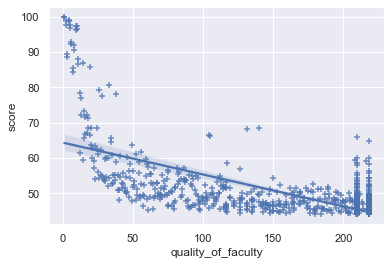

In [10]:
sns.regplot(data_df['quality_of_faculty'], data_df['score'], marker="+")
plt.show()

可以看到师资质量和得分确实有一定的负相关关系，但明显并不是线性的，因此用排名做线性回归只能得到尚可的结果。

## 六、讨论

* 对特征做变换
    * 输入取 log
        * 输出能不能取 log？
    * 多项式特征：[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* 输入特征间的共线性
    * `broad_impact`？
    * one-hot 形式引入离散的地区特征？
        * [Dummy variable trap](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29)
    * 岭回归、Lasso 回归